In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


In [3]:
# Read all about it
data_url = "https://datadryad.org/dataset/doi:10.5061/dryad.hhmgqnknt"

In [4]:
# getting data from drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the folder you want to access
project_folder = "/content/drive/My Drive/ML_Proj/plant_dataset"

Mounted at /content/drive


# **Loading the Data**

In [5]:
# loading in the plant data sts

biomass = os.path.join(project_folder, 'ALAN_biomass.csv')
biomass_df = pd.read_csv(biomass, sep=';') # gets rid of the semi colons
biomass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  24 non-null     object 
 1   biomass             24 non-null     float64
 2   Unit                24 non-null     int64  
 3   harvest             24 non-null     int64  
 4   Treatment [lux]     24 non-null     float64
 5   Treatment [lux]_ln  24 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
specie_biomass = os.path.join(project_folder, 'ALAN_specis_biomass.csv')
specie_biomass_df = pd.read_csv(specie_biomass, sep=';')
specie_biomass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   species_ID  156 non-null    object 
 1   species     156 non-null    object 
 2   unit        156 non-null    int64  
 3   light       156 non-null    float64
 4   mass        156 non-null    float64
 5   harvest     156 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 7.4+ KB


In [7]:
specie_biomass_df.head(20)

,species_ID,species,unit,light,mass,harvest
0,Bro_hor_3_2,Bro_hor,3,0.9400,15.89,2
1,Bro_hor_1_2,Bro_hor,1,0.0810,3.55,2
2,Bro_hor_2_2,Bro_hor,2,0.3000,3.05,2
3,Bro_hor_5_2,Bro_hor,5,0.0000,2.27,2
4,Bro_hor_6_2,Bro_hor,6,0.0087,14.77,2
5,Bro_hor_7_2,Bro_hor,7,0.0280,3.52,2
6,Bro_hor_8_2,Bro_hor,8,0.0000,2.86,2
7,Bro_hor_9_2,Bro_hor,9,9.8830,8.33,2
8,Bro_hor_10_2,Bro_hor,10,3.0330,2.53,2
9,Bro_hor_11_2,Bro_hor,11,30.3130,0.26,2


In [8]:
traits = os.path.join(project_folder, 'ALAN_traits.csv')
traits_df = pd.read_csv(traits, sep=';')
traits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                72 non-null     object 
 1   Species           72 non-null     object 
 2   Phase             72 non-null     int64  
 3   ID_neu            72 non-null     object 
 4   EcoUnit           72 non-null     int64  
 5   Treatment         72 non-null     float64
 6   Hair density      45 non-null     float64
 7   Toughness         69 non-null     float64
 8   CA_Mean           69 non-null     float64
 9   Fresh_weight [g]  68 non-null     float64
 10  Dry weight[mg]    68 non-null     float64
 11  Leaf area         68 non-null     float64
 12  SLA               68 non-null     float64
 13  LDMC              68 non-null     float64
 14  LDMC_2            68 non-null     float64
 15  SPAD              69 non-null     float64
 16  Height            69 non-null     float64
 17 

In [9]:
# getting rid of N/A values
traits_df.fillna(0, inplace=True)
traits_df.head()

,ID,Species,Phase,ID_neu,EcoUnit,Treatment,Hair density,Toughness,CA_Mean,Fresh_weight [g],Dry weight[mg],Leaf area,SLA,LDMC,LDMC_2,SPAD,Height,FvFm,PIabs
0,Bro_hor_1_2,Bromus hordeaceus,2,Bromus hordeaceus_2,1,0.081,2.15975,4.3675,106.765000,2.511,413.0,14791.5,35.8148,164476.3043,164.476304,34.533333,41.833333,0.810667,3.488333
1,Bro_hor_2_2,Bromus hordeaceus,2,Bromus hordeaceus_2,2,0.300,2.28175,3.7850,109.420000,2.115,368.0,12468.4,33.8815,173995.2719,173.995272,28.533333,41.000000,0.819333,3.738000
2,Bro_hor_3_2,Bromus hordeaceus,2,Bromus hordeaceus_2,3,0.940,1.91600,3.9900,112.823333,3.136,512.0,16378.9,31.9900,163265.3061,163.265306,29.366667,38.000000,0.810500,3.683000
3,Bro_hor_4_2,Bromus hordeaceus,2,Bromus hordeaceus_2,4,0.103,2.37050,4.8025,111.597500,2.907,477.0,16152.9,33.8635,164086.6873,164.086687,33.900000,40.500000,0.811833,3.526333
4,Bro_hor_5_2,Bromus hordeaceus,2,Bromus hordeaceus_2,5,0.000,1.81650,3.7775,104.390000,3.579,526.0,19161.0,36.4278,146968.4269,146.968427,32.500000,50.333333,0.800000,3.221500


In [10]:
print(traits_df.describe())

           Phase    EcoUnit  Treatment  Hair density   Toughness      CA_Mean  \
count  72.000000  72.000000  72.000000      72.000000   72.000000   72.000000   
mean    2.500000   6.500000   6.250225       0.882804    2.445532   86.054259   
std     0.503509   3.476278  11.171530       0.880833    1.091361   35.570814   
min     2.000000   1.000000   0.000000       0.000000    0.000000    0.000000   
25%     2.000000   3.750000   0.023175       0.000000    1.703750   53.424375   
50%     2.500000   6.500000   0.201500       0.595000    2.213750  103.072500   
75%     3.000000   9.250000   4.745500       1.751083    3.148125  114.183125   
max     3.000000  12.000000  30.313000       2.750000    4.802500  121.812500   

       Fresh_weight [g]  Dry weight[mg]     Leaf area        SLA  \
count         72.000000       72.000000     72.000000  72.000000   
mean           2.896222      373.458333  12597.731944  36.535617   
std            3.481086      423.336544   9310.893892  11.336565  

# **EDA**

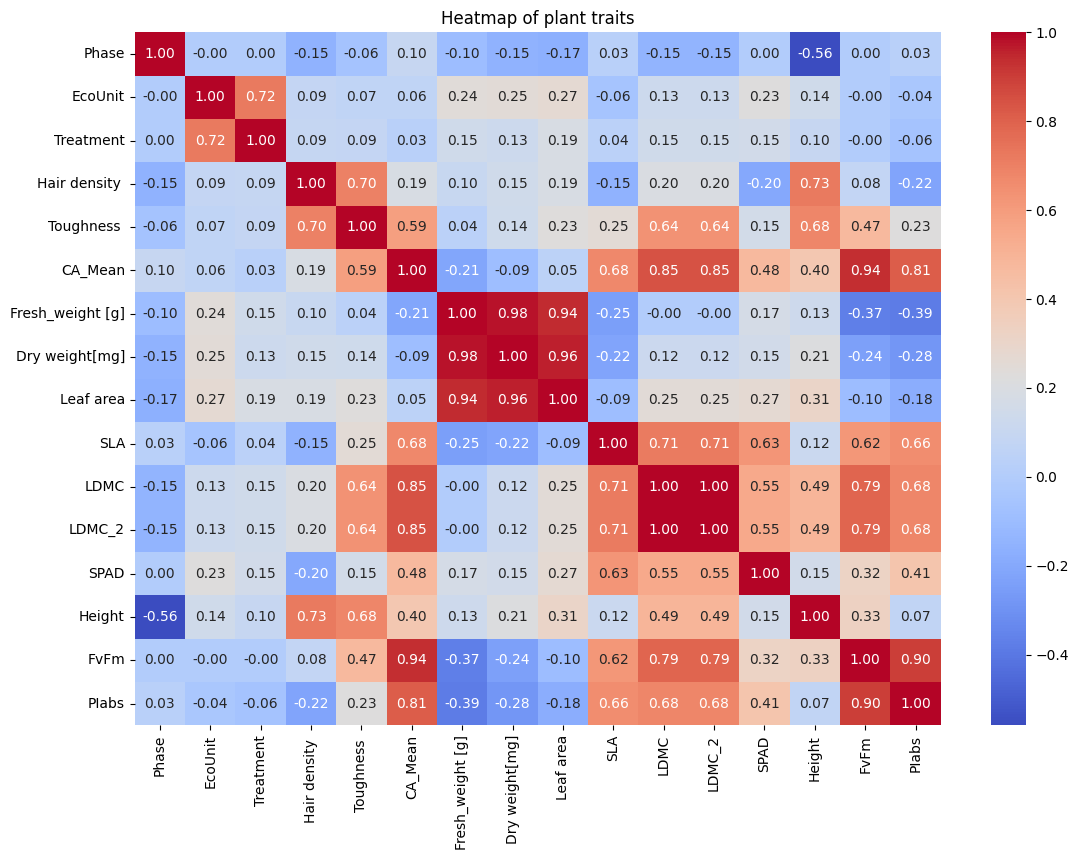

In [11]:
# Compute covariance matrix
numerical_cols = traits_df.select_dtypes(include=['number']).columns
numerical_df = traits_df[numerical_cols]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of plant traits")
plt.show()

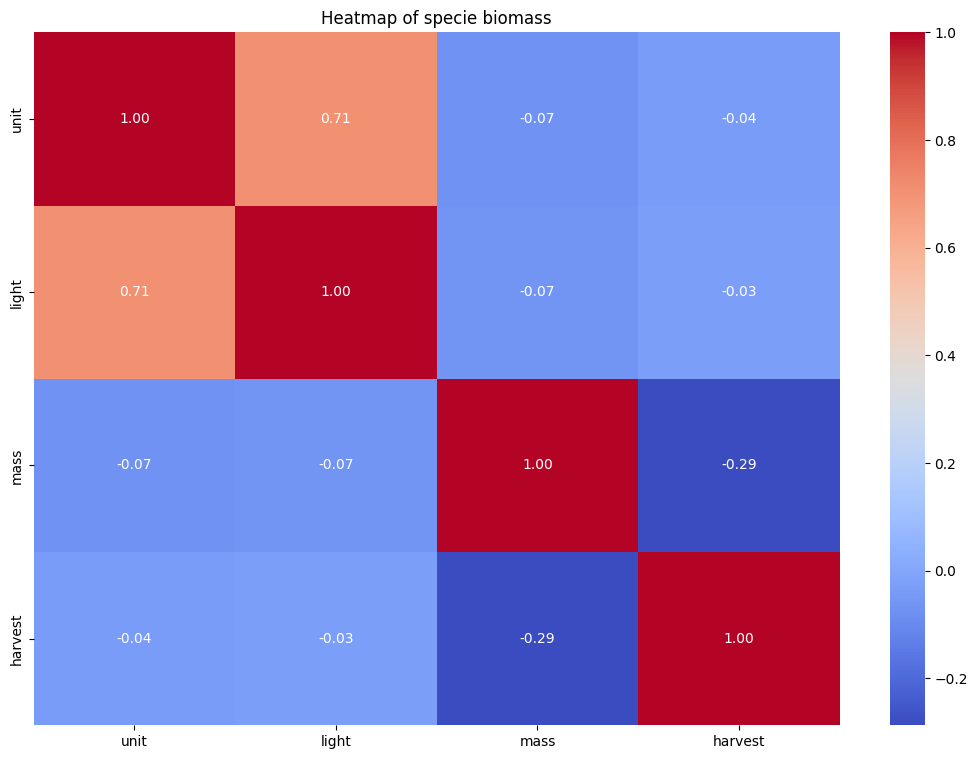

In [12]:
# Compute covariance matrix
numerical_cols = specie_biomass_df.select_dtypes(include=['number']).columns
numerical_df = specie_biomass_df[numerical_cols]

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap of specie biomass")
plt.show()

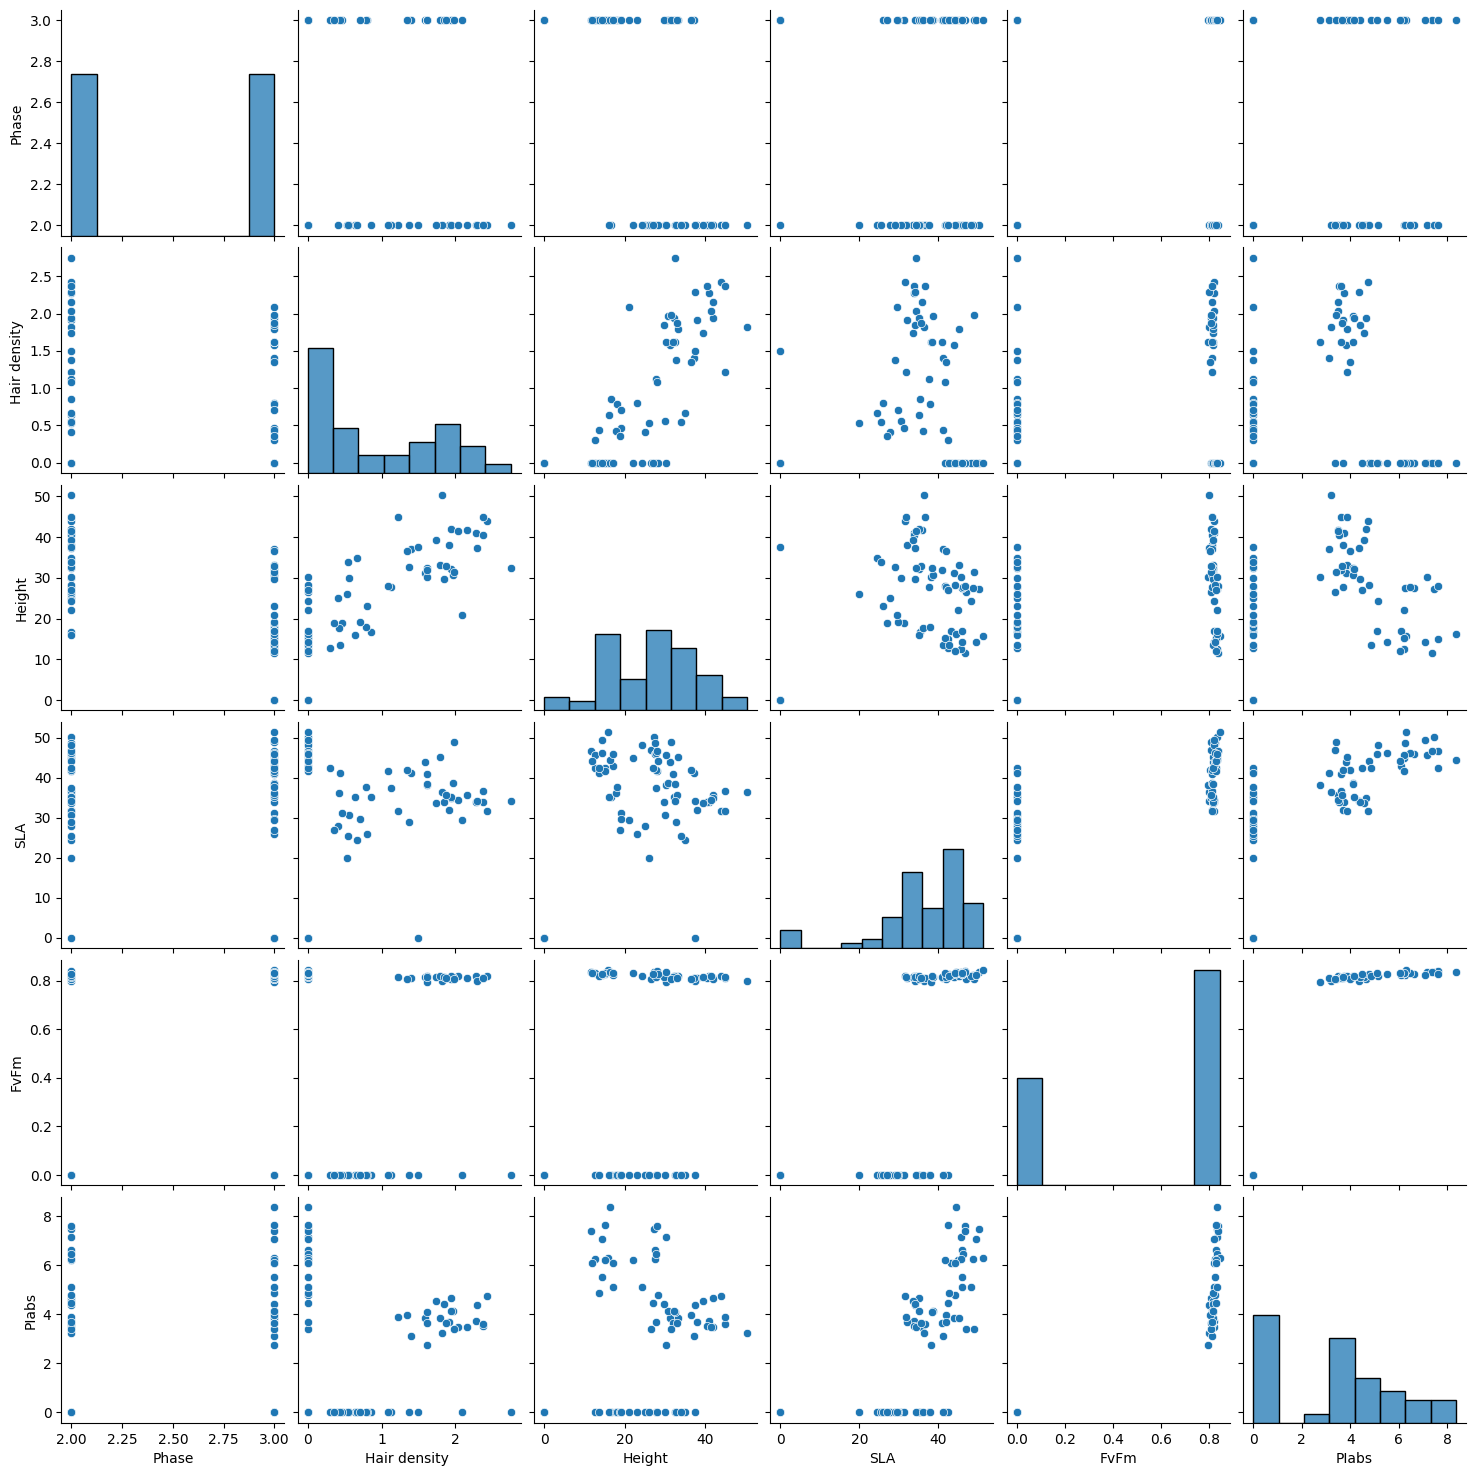

In [13]:
# pairplot
#sns.set(color_codes=True)
sns.pairplot(traits_df, vars=['Phase', 'Hair density ', 'Height', 'SLA', 'FvFm', 'PIabs'])
plt.show()

In [14]:
# LDMC == Leaf dry matter content
# SLA == specific leaf area

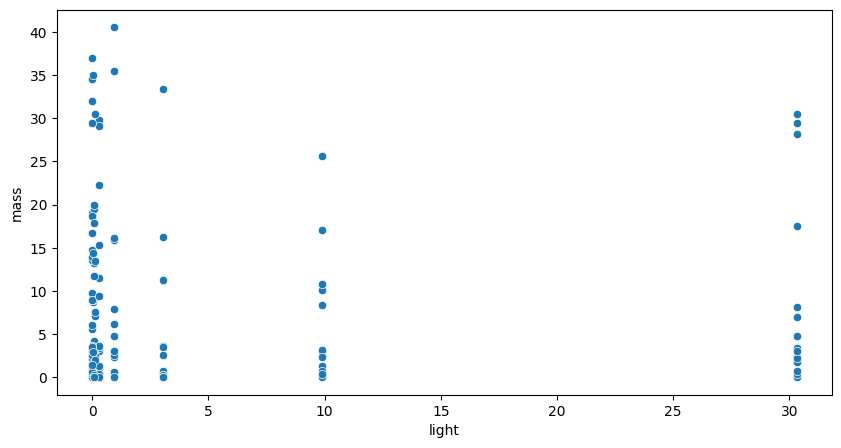

In [15]:
# Want to examine leaf area and dry weight
plt.figure(figsize=(10, 5))
sns.scatterplot(data=specie_biomass_df, x='light', y='mass')
plt.show()

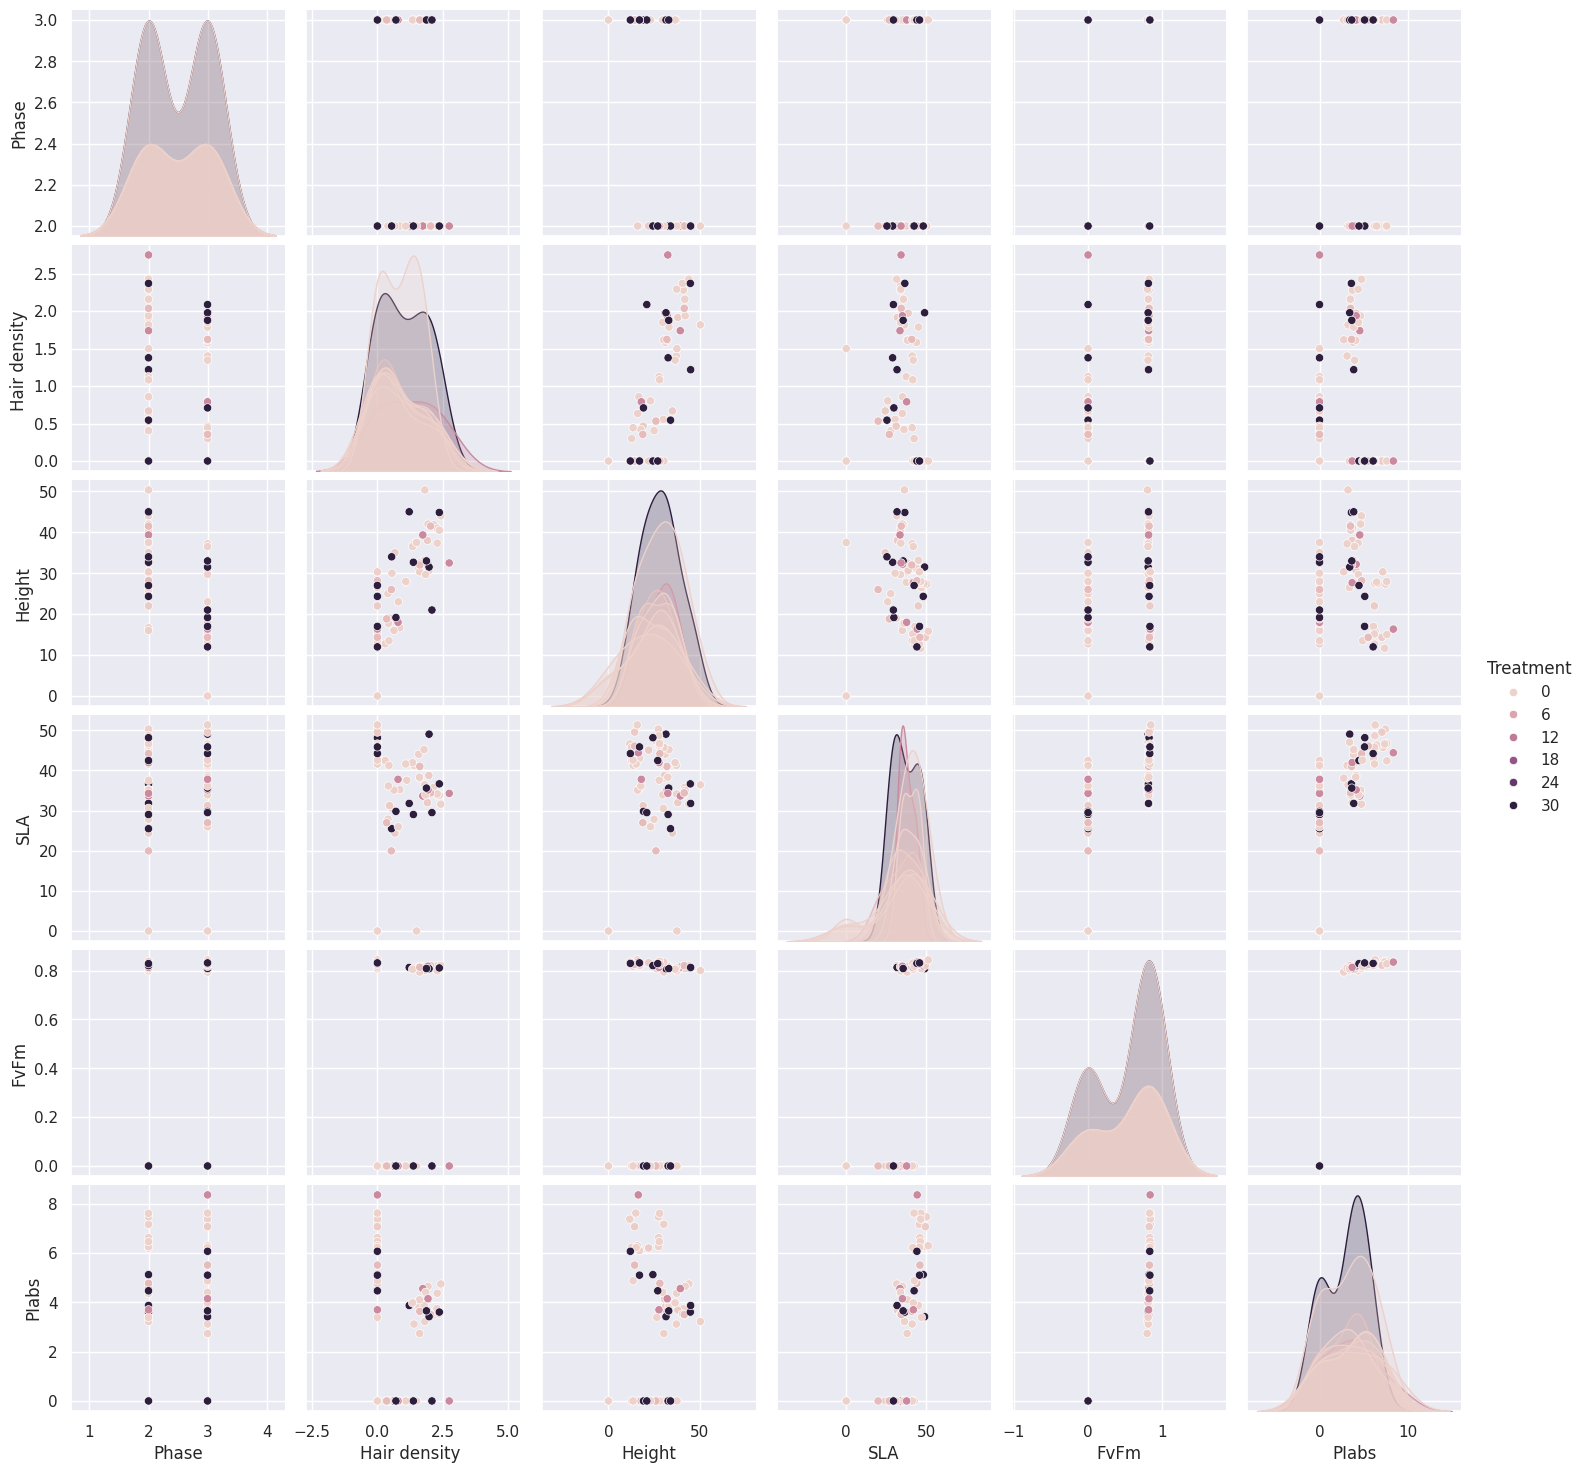

In [16]:
# pairplot
sns.set(color_codes=True)
sns.pairplot(traits_df, hue = 'Treatment', vars=['Phase', 'Hair density ', 'Height', 'SLA', 'FvFm', 'PIabs'])
plt.show()

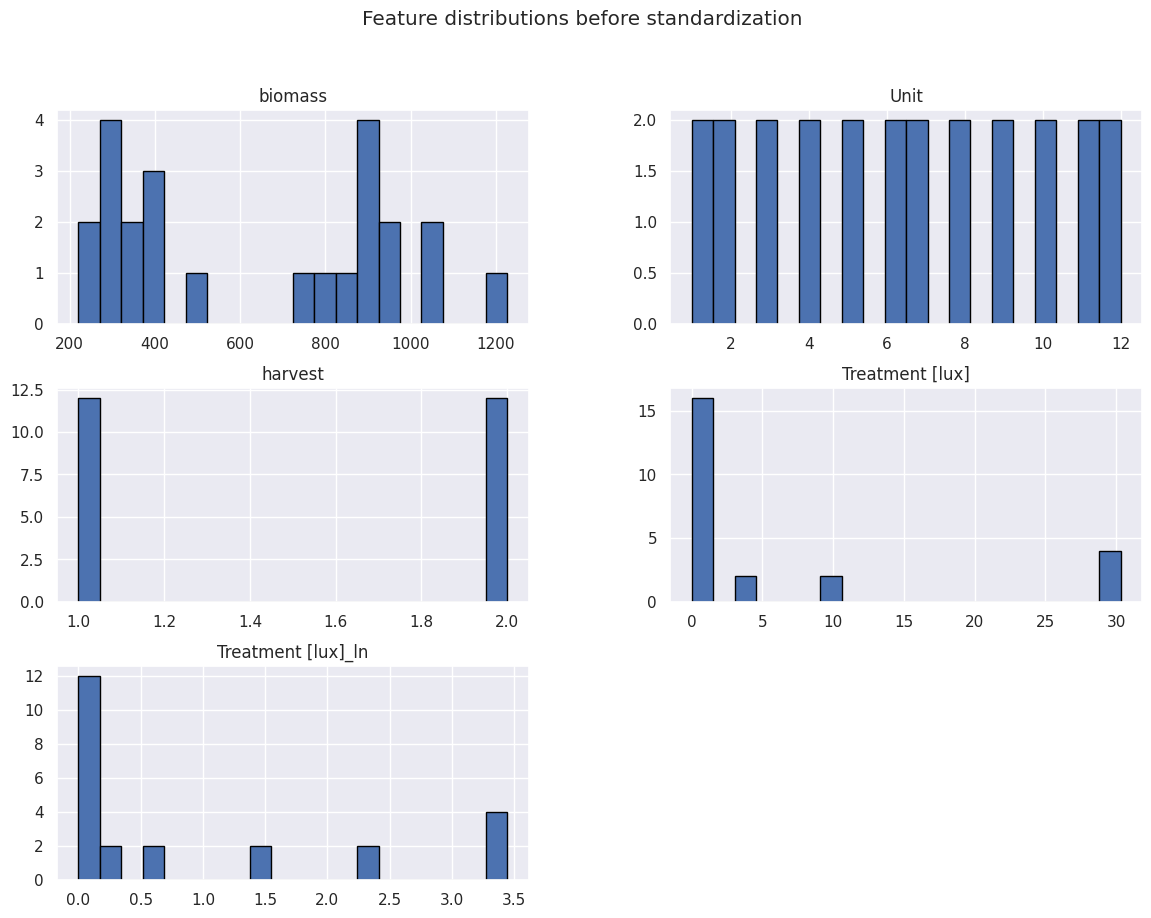

In [17]:
biomass_df.hist(figsize=(14, 10), bins = 20, edgecolor='black')
plt.suptitle("Feature distributions before standardization")
plt.show()

## **Standardizing the data**

In [18]:
# PCA
scaler = StandardScaler()
biomass_x_scaled = scaler.fit_transform(biomass_df)

biomass_df_scaled = pd.DataFrame(biomass_x_scaled, columns=biomass_df.columns)

print("Mean after standardizatio:\n", biomass_df_scaled.mean().round(2))
print("\nStandard Deviation after standardization:\n", biomass_df_scaled.std().round(2))

Mean after standardizatio:
 ID                    0.0
biomass              -0.0
Unit                  0.0
harvest               0.0
Treatment [lux]      -0.0
Treatment [lux]_ln    0.0
dtype: float64

Standard Deviation after standardization:
 ID                    1.02
biomass               1.02
Unit                  1.02
harvest               1.02
Treatment [lux]       1.02
Treatment [lux]_ln    1.02
dtype: float64


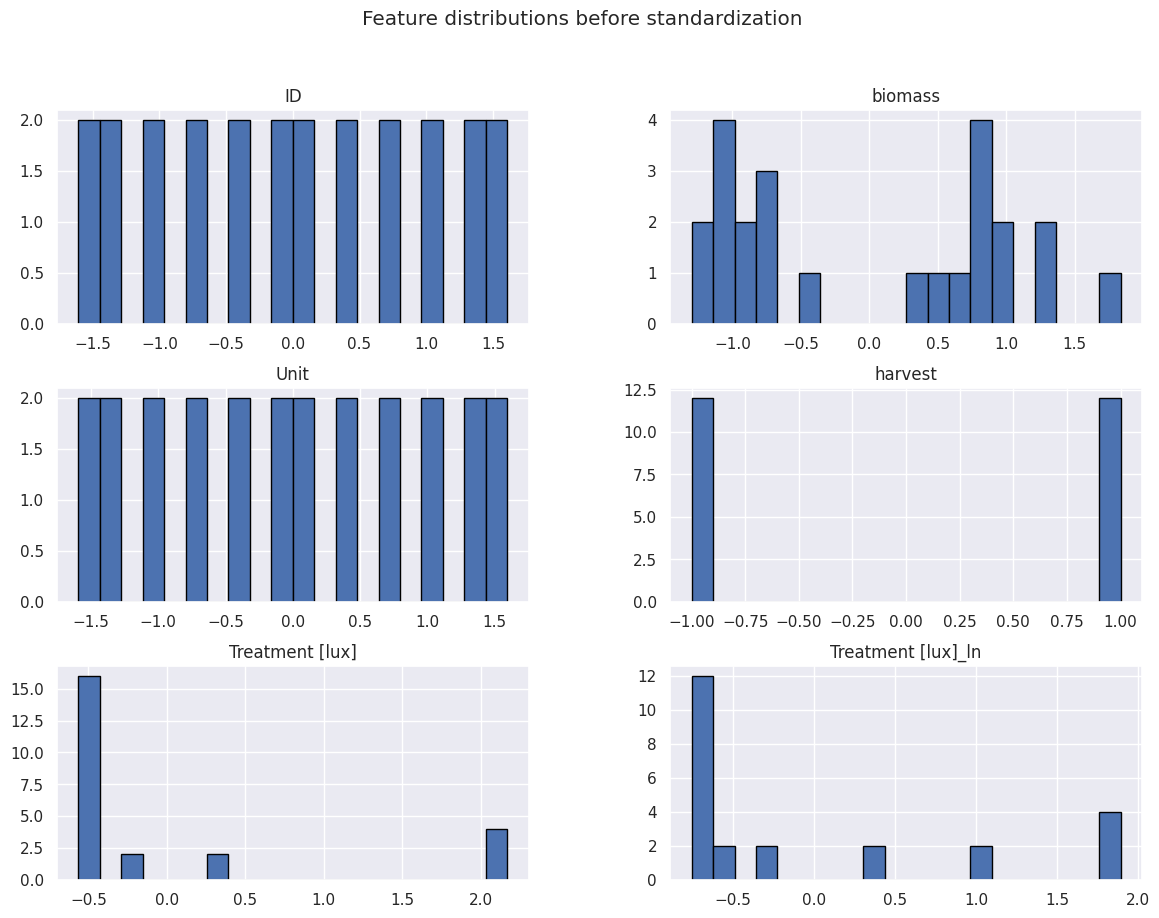

In [19]:
biomass_df_scaled.hist(figsize=(14, 10), bins = 20, edgecolor='black')
plt.suptitle("Feature distributions before standardization")
plt.show()

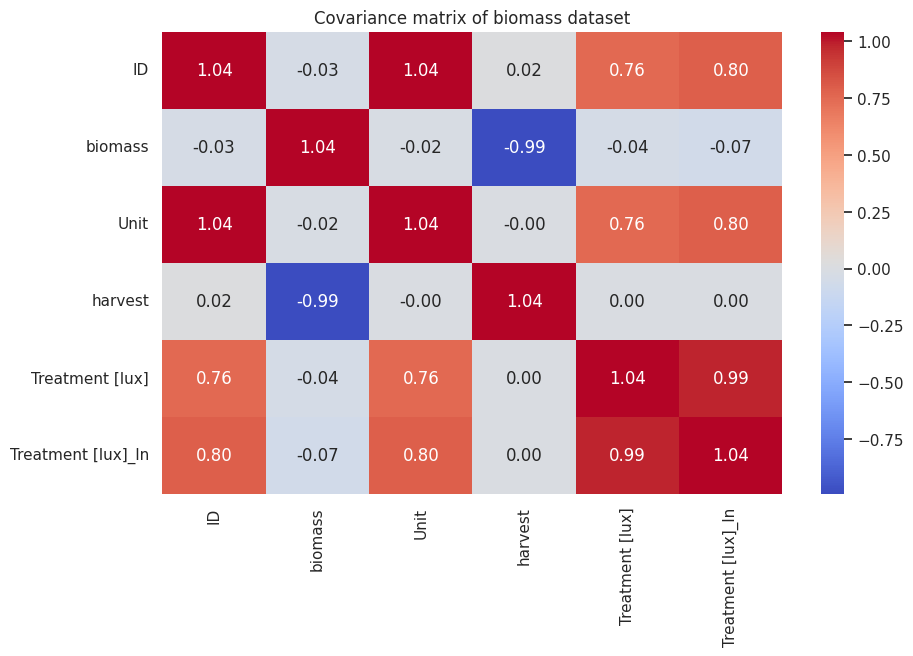

In [20]:
cov_matrix = np.cov(biomass_x_scaled.T) # transpose scaleed matrix to get correct shape

cov_df = pd.DataFrame(cov_matrix, index=biomass_df.columns, columns=biomass_df.columns)

plt.figure(figsize=(10,6))
sns.heatmap(cov_df, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Covariance matrix of biomass dataset")
plt.show()

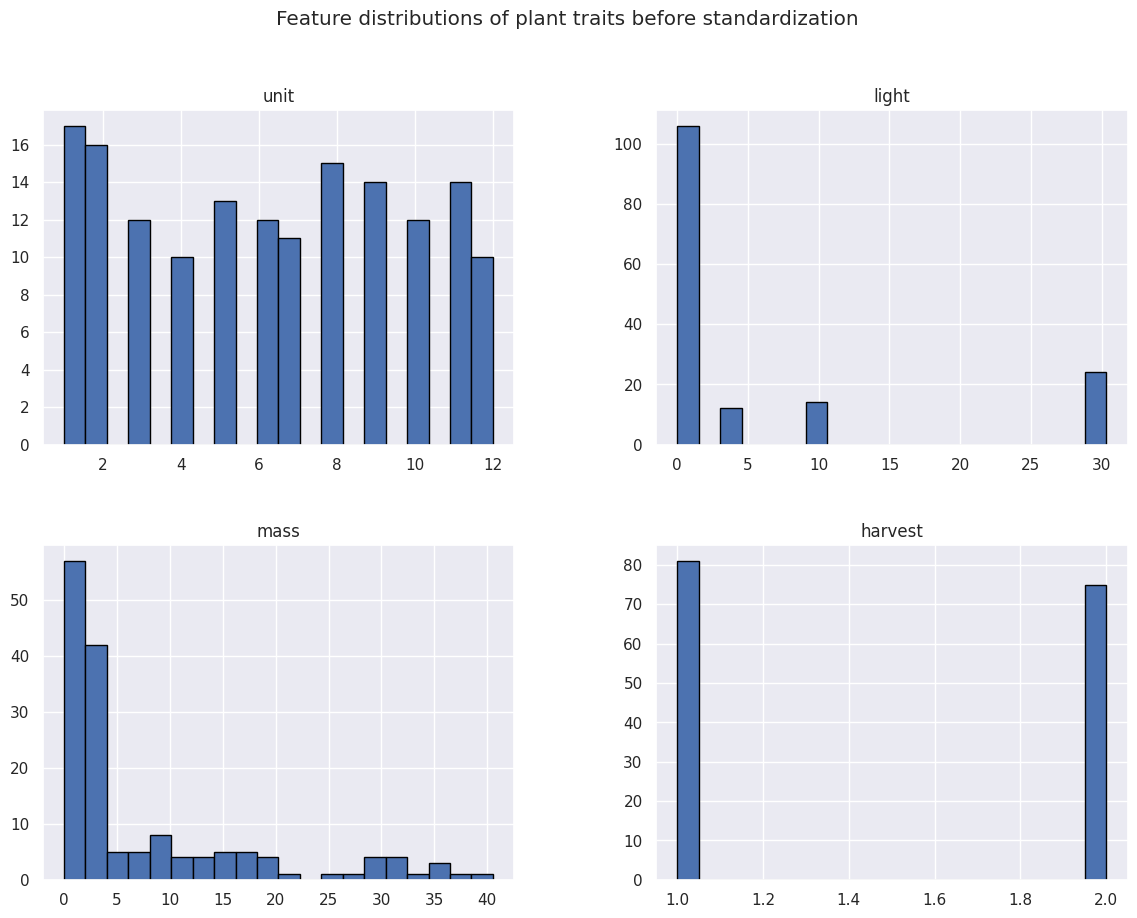

In [21]:
numerical_df.hist(figsize=(14, 10), bins = 20, edgecolor='black')
plt.suptitle("Feature distributions of plant traits before standardization")
plt.show()

In [22]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unit     156 non-null    int64  
 1   light    156 non-null    float64
 2   mass     156 non-null    float64
 3   harvest  156 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 5.0 KB


In [23]:
traits_x_scaled = scaler.fit_transform(numerical_df)

traits_df_scaled = pd.DataFrame(traits_x_scaled, columns=numerical_df.columns)

print("Mean after standardization:\n", traits_df_scaled.mean().round(2))
print("\nStandard Deviation after standardization:\n", traits_df_scaled.std().round(2))

Mean after standardization:
 unit       0.0
light      0.0
mass      -0.0
harvest   -0.0
dtype: float64

Standard Deviation after standardization:
 unit       1.0
light      1.0
mass       1.0
harvest    1.0
dtype: float64


In [24]:
traits_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unit     156 non-null    float64
 1   light    156 non-null    float64
 2   mass     156 non-null    float64
 3   harvest  156 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


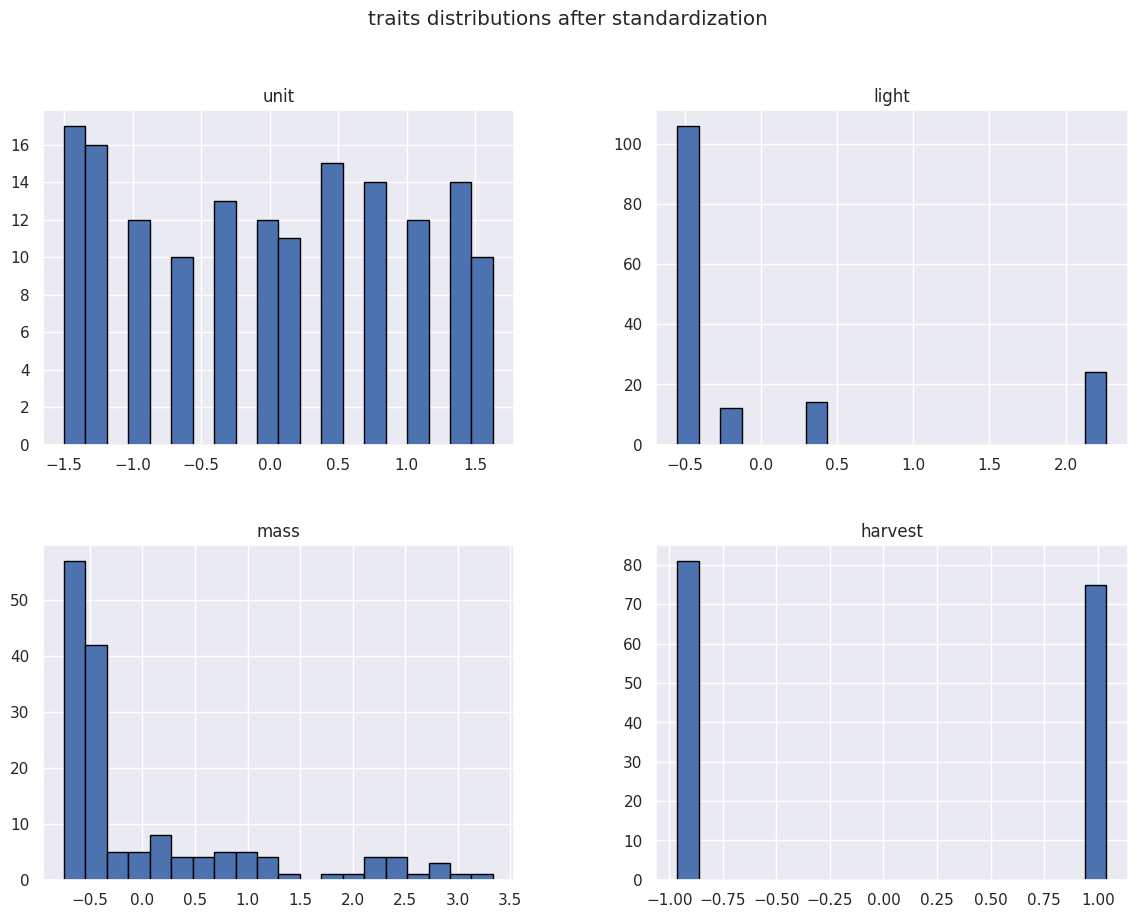

In [25]:
traits_df_scaled.hist(figsize=(14, 10), bins = 20, edgecolor='black')
plt.suptitle("traits distributions after standardization")
plt.show()

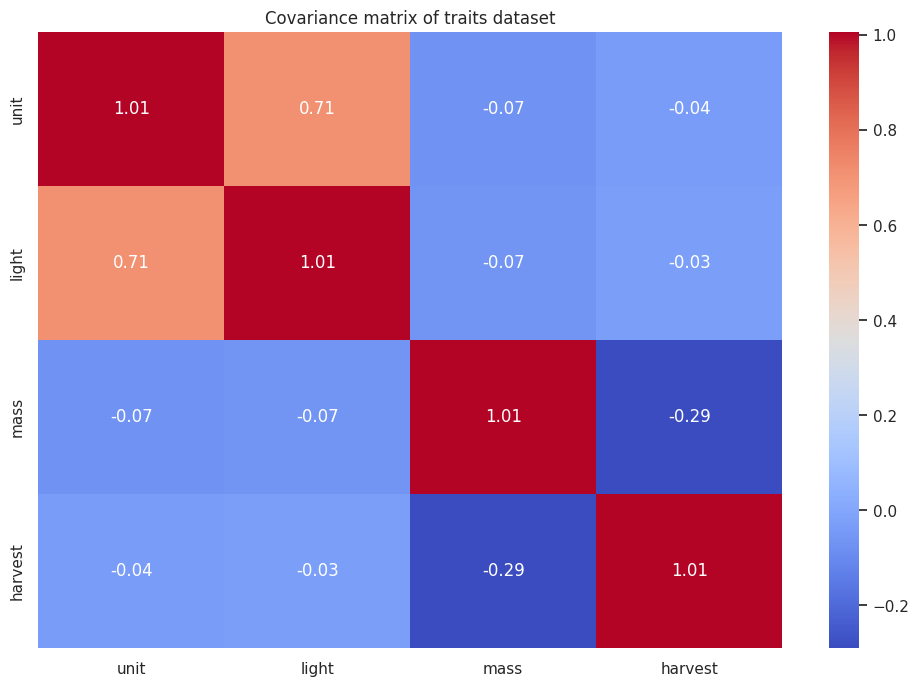

In [26]:
traits_cov_matrix = np.cov(traits_x_scaled.T) # transpose scaleed matrix to get correct shape

traits_cov_df = pd.DataFrame(traits_cov_matrix, index = numerical_df.columns, columns=numerical_df.columns)

plt.figure(figsize=(12,8))
sns.heatmap(traits_cov_df, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Covariance matrix of traits dataset")
plt.show()

In [27]:
# get eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigen_df = pd.DataFrame({"Eigenvalue": eigenvalues})
eigen_df = eigen_df.sort_values(by="Eigenvalue", ascending = False)
eigen_df

,Eigenvalue
0,3.614961e+00
1,2.032249e+00
2,5.078580e-01
5,6.964864e-02
4,3.615317e-02
3,-3.166737e-16


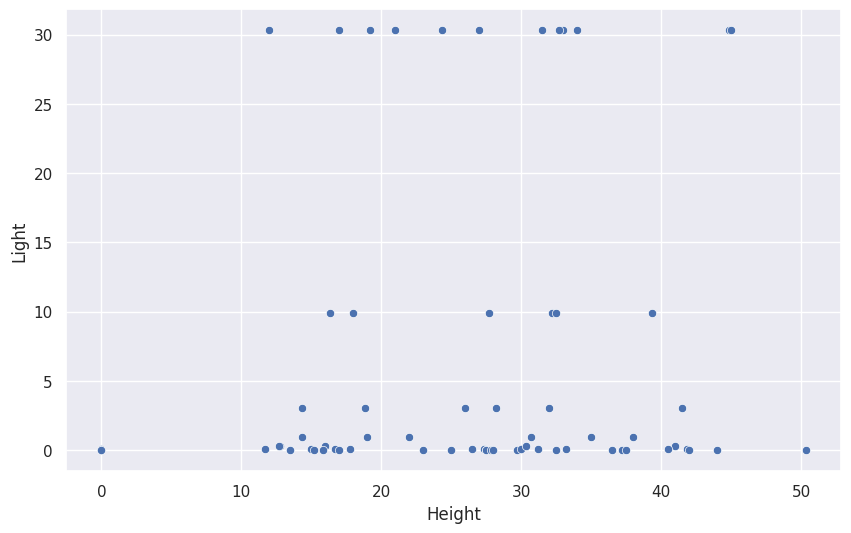

In [50]:
# light and height
plt.figure(figsize=(10, 6))
sns.scatterplot(x=traits_df['Height'], y=traits_df['Treatment'])
plt.xlabel('Height')
plt.ylabel('Light')
plt.show()

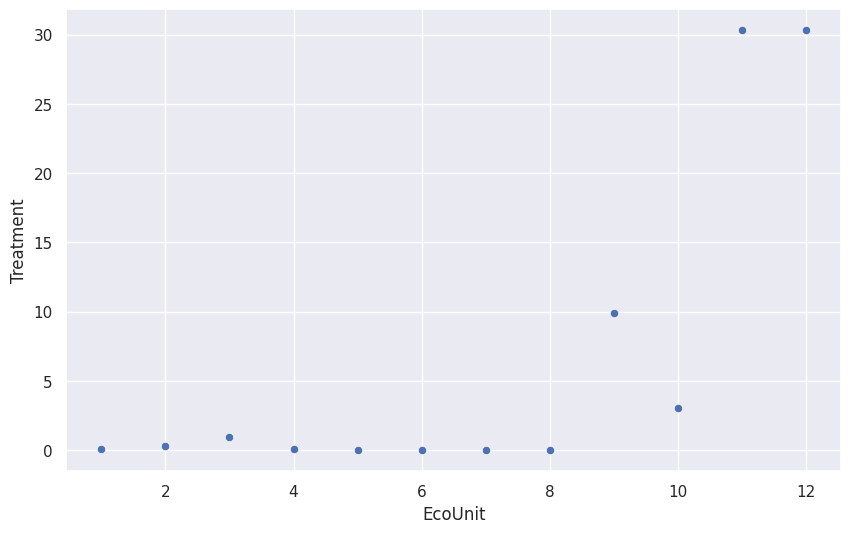

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=traits_df['EcoUnit'], y=traits_df['Treatment'])
plt.show()

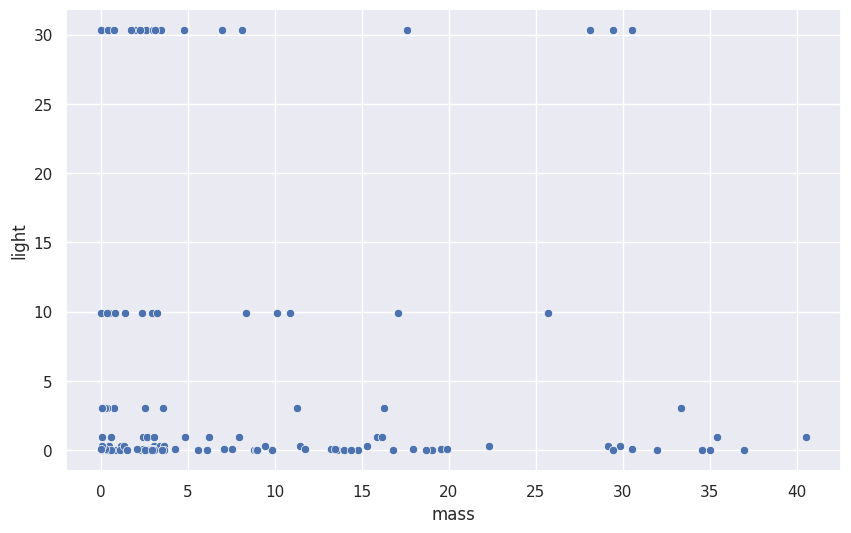

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=specie_biomass_df['mass'], y=specie_biomass_df['light'])
plt.show()

## **PCA**

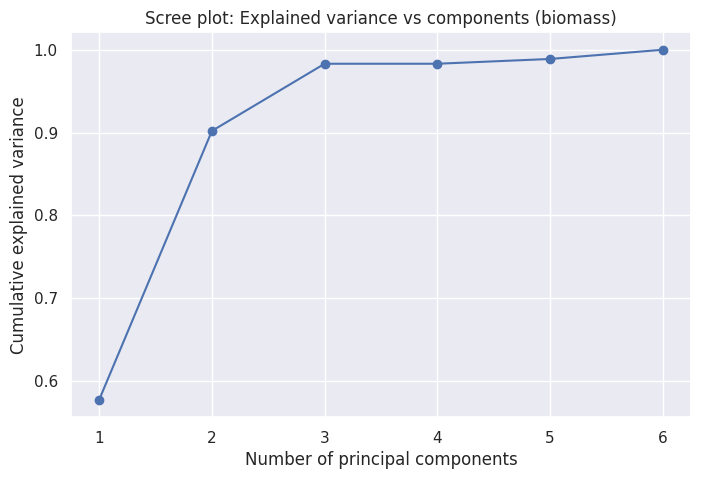

In [28]:
explained_variance_ratio = eigenvalues / sum(eigenvalues)

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), cumulative_variance, marker='o')

plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree plot: Explained variance vs components (biomass)")
plt.grid(True)

plt.show()

In [29]:
# get eigen vectors
eigenvalues_1, eigenvectors_1 = np.linalg.eig(traits_cov_matrix)

eigen_df_1 = pd.DataFrame({"Eigenvalue": eigenvalues_1})
eigen_df_1 = eigen_df_1.sort_values(by="Eigenvalue", ascending = False)
eigen_df_1

,Eigenvalue
0,1.732132
2,1.292839
3,0.707413
1,0.293424


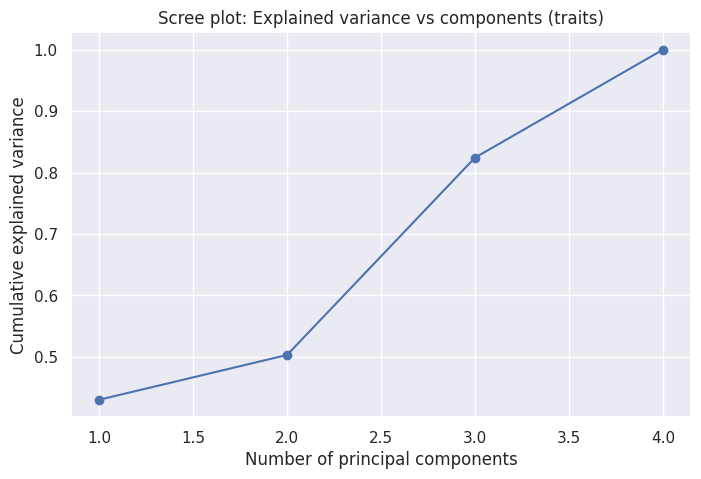

In [30]:
explained_variance_ratio = eigenvalues_1 / sum(eigenvalues_1)

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), cumulative_variance, marker='o')

plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree plot: Explained variance vs components (traits)")
plt.grid(True)

plt.show()

MSE: 2.989102027349021e-10
R² score: 0.9999999994273108


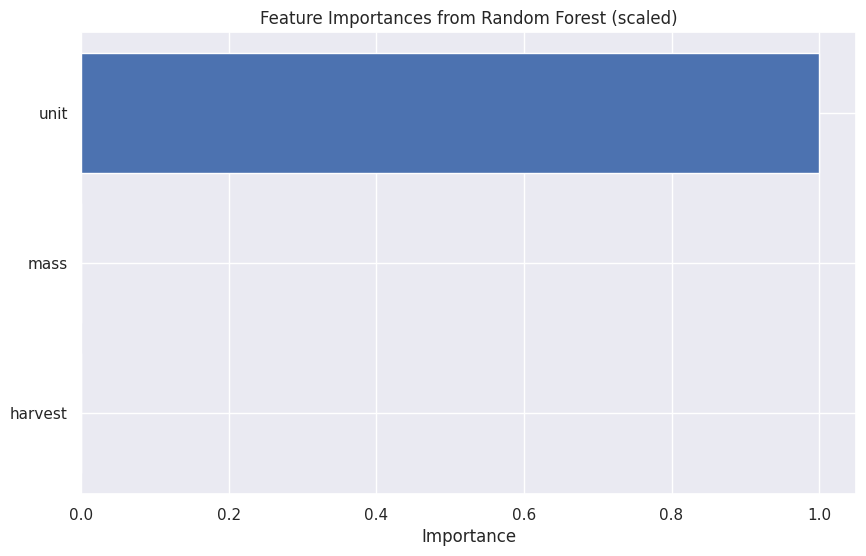

In [31]:
X = traits_df_scaled.drop('light', axis=1)
Y = traits_df_scaled['light']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# regressor for continuous values
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R² score: {r2}")

importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest (scaled)')
plt.show()


In [34]:
print(importance_df)

   Feature    Importance
0     unit  1.000000e+00
1     mass  9.349986e-09
2  harvest  2.743745e-11


## **Model Training**

RMSE: 0.11629942405412404
R² score: 0.9991778785617376


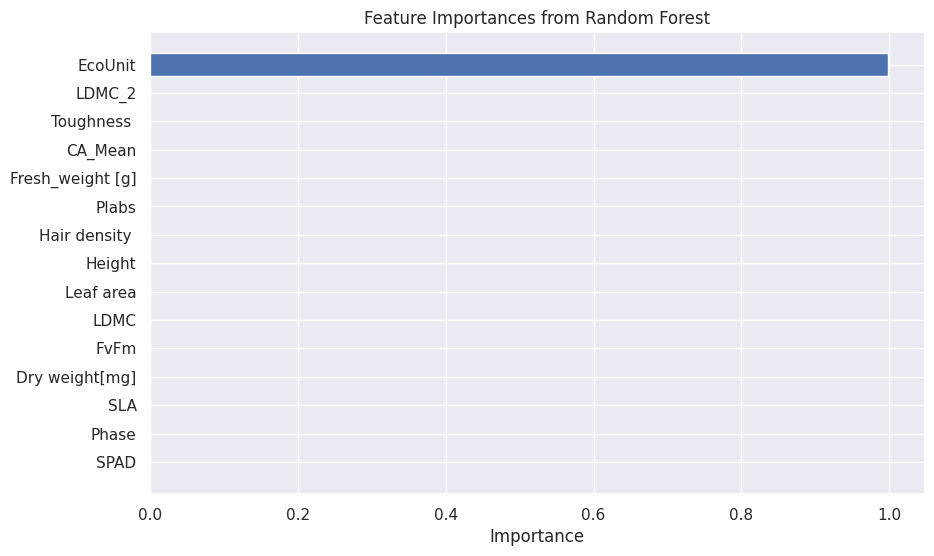

In [36]:
X = traits_df.drop(['Treatment', 'ID', 'Species', 'ID_neu'], axis=1) # dropping the categorical columns
Y = traits_df['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# regressor for continuous values
model = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth= 10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

importances = model.feature_importances_
feature_names = X.columns


# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


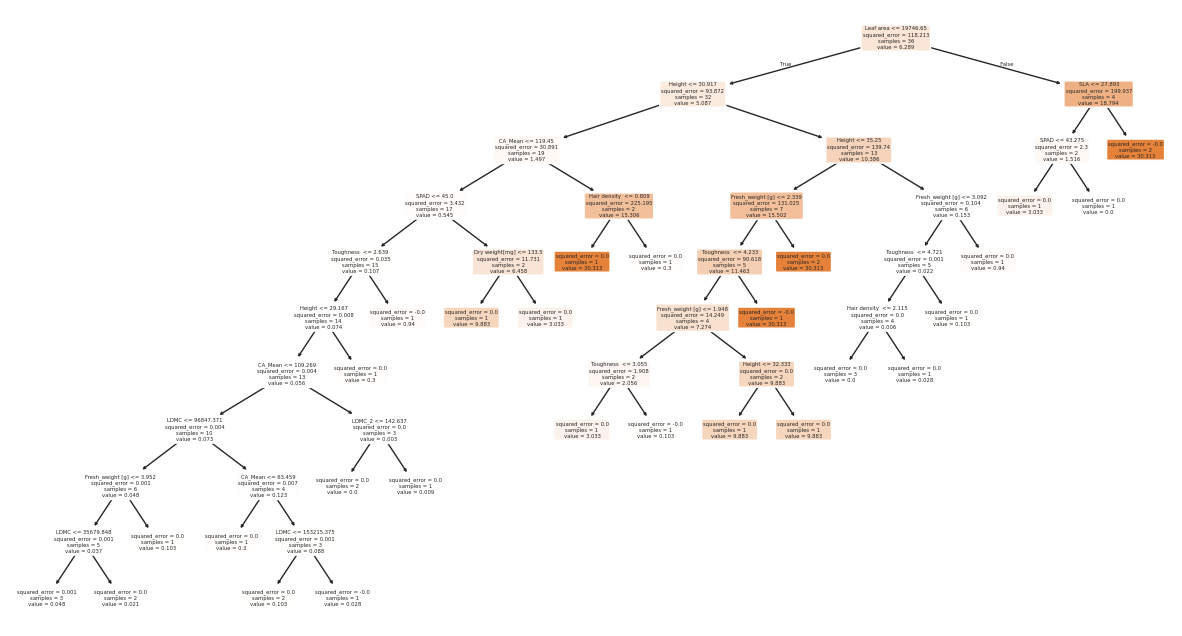

In [44]:
# plot rf tree
# not really concerned about this right now
plt.figure(figsize=(15, 8))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()

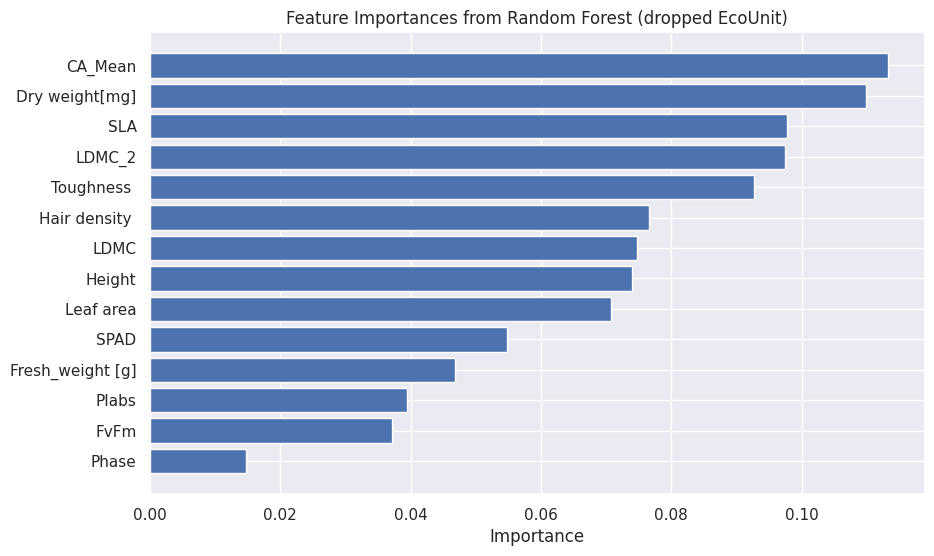

In [37]:
X = traits_df.drop(['Treatment', 'ID', 'Species', 'ID_neu', 'EcoUnit'], axis=1)
Y = traits_df['Treatment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# regressor for continuous values
model = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth= 10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
importances = model.feature_importances_
feature_names = X.columns

# after dropped
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest (dropped EcoUnit)')
plt.show()


In [39]:
print(importance_df)

             Feature  Importance
3            CA_Mean    0.113231
5     Dry weight[mg]    0.109814
7                SLA    0.097754
9             LDMC_2    0.097436
2         Toughness     0.092740
1      Hair density     0.076543
8               LDMC    0.074698
11            Height    0.074003
6          Leaf area    0.070716
10              SPAD    0.054836
4   Fresh_weight [g]    0.046862
13             PIabs    0.039413
12              FvFm    0.037143
0              Phase    0.014812


In [40]:
# lasso Regression
alphas = np.logspace(-3, 3, 50)
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
residuals = y_test - y_pred

# R^2 and rmse scores
r2_log = r2_score(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# printing results
print("LASSO Results:")
print(f"R²: {r2_log:.4f}")
print(f"RMSE: {rmse_lasso: .4f}\n")
print("Random Forest Results:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse: .4f}")

LASSO Results:
R²: 0.0529
RMSE:  11.5748

Random Forest Results:
R²: 0.9992
RMSE:  0.1163


## **More EDA**

In [51]:
def generate_bar_chart(data, column):

    plt.figure(figsize=(10, 6)) # specify dimensions of visualization

    if column in ["light", "mass"]:  #showing the distribution of the light
        # Kernel density estimation applies a smooth curve to the histograms
        sns.histplot(data[column], bins=30, kde=True)  # Use histplot with bins (# of bars)
        plt.title(f'Distribution of {column}', fontsize=16) # Add a title
        plt.xlabel(column, fontsize=16) # column name as x-axis label
        plt.ylabel('Frequency', fontsize=16) # y-axis label
        plt.xticks(rotation=45, ha='right', fontsize=16)
        plt.yticks(fontsize=16)
    # else:
    #     # For other columns, use countplot
    #     sns.countplot(x=column, data=data) # create a plot of counts
    #     plt.title(f'Count Frequency of {column}', fontsize=16)
    #     plt.xlabel(column, fontsize=16)
    #     plt.ylabel('Frequency', fontsize=16)
    #     plt.xticks(rotation=45, ha='right', fontsize=16)
    #     plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.show()

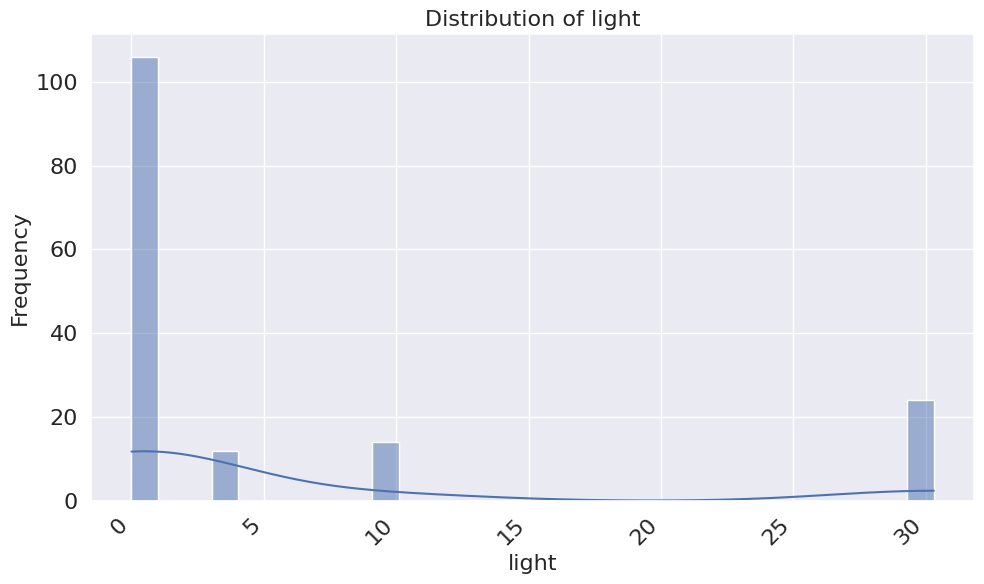

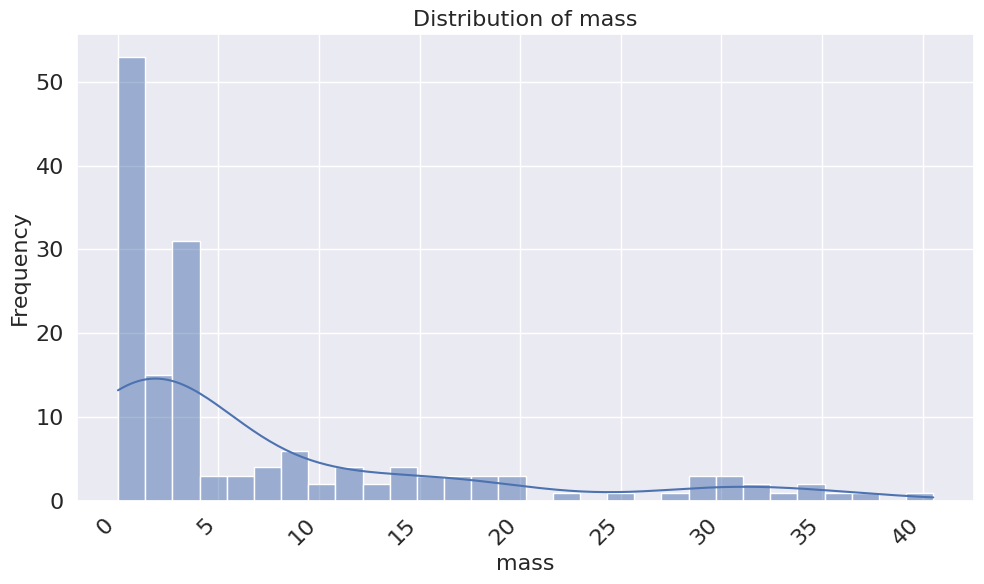

In [52]:
columns_to_plot = ['light', 'mass']

# Loop through columns and generate charts
for column in columns_to_plot:
    generate_bar_chart(specie_biomass_df, column)


In [53]:
# need to bin the light treatments
# dark, bright, mid
specie_biomass_df['light_binned'] = pd.cut(specie_biomass_df['light'], bins = [-1, 6, 15, np.inf], labels = ['dark', 'mid', 'bright'])
(specie_biomass_df)

,species_ID,species,unit,light,mass,harvest,light_binned
0,Bro_hor_3_2,Bro_hor,3,0.9400,15.89,2,dark
1,Bro_hor_1_2,Bro_hor,1,0.0810,3.55,2,dark
2,Bro_hor_2_2,Bro_hor,2,0.3000,3.05,2,dark
3,Bro_hor_5_2,Bro_hor,5,0.0000,2.27,2,dark
4,Bro_hor_6_2,Bro_hor,6,0.0087,14.77,2,dark
...,...,...,...,...,...,...,...
151,Vic_sep_7_1,Vic_sep,7,0.0280,2.92,1,dark
152,Vic_sep_8_1,Vic_sep,8,0.0000,1.47,1,dark
153,Vic_sep_9_1,Vic_sep,9,9.8830,2.33,1,mid
154,Vic_sep_11_1,Vic_sep,11,30.3130,3.08,1,bright


<ipython-input-54-a5d5dd45bd6e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = specie_biomass_df.groupby('light_binned')['light'].mean()


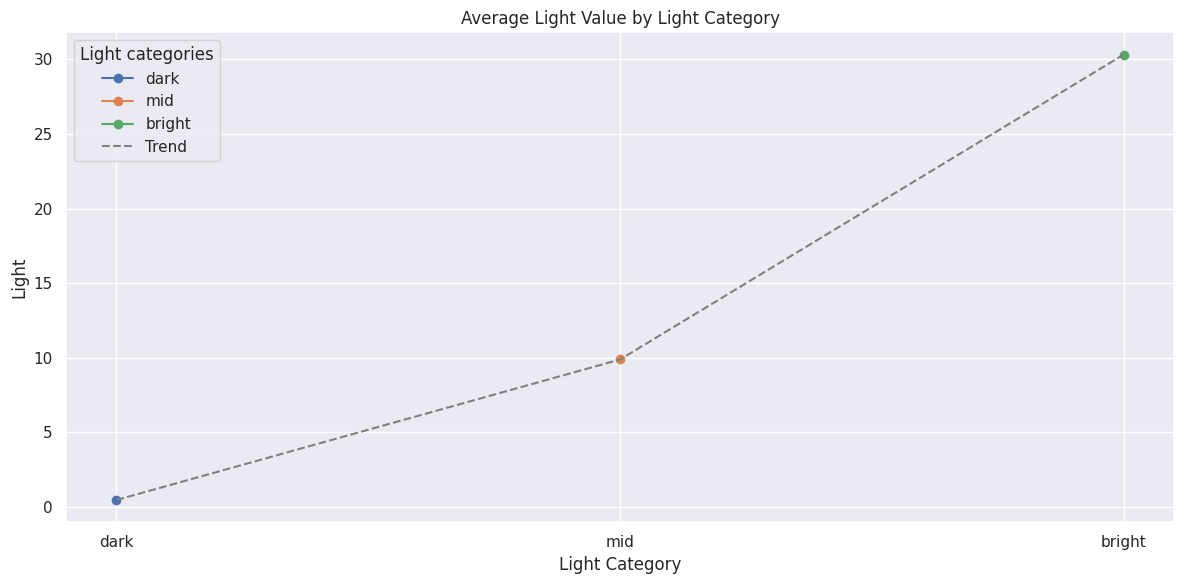

In [54]:
# avg of the bin ategories
grouped = specie_biomass_df.groupby('light_binned')['light'].mean()
plt.figure(figsize=(12, 6))

for category in ['dark', 'mid', 'bright']:
    if category in grouped.index:
        plt.plot(
            [category],  # X-axis: single category
            [grouped[category]],  # Y-axis: corresponding light value
            marker='o',
            label=category
        )
plt.plot(grouped.loc[['dark', 'mid', 'bright']], label='Trend', linestyle='--', color='gray')
plt.title('Average Light Value by Light Category')
plt.xlabel('Light Category')
plt.ylabel('Light')
plt.legend(title="Light categories")
plt.grid(True)
plt.tight_layout()
plt.show()
